In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 40)
pd.set_option('display.precision', 3)

In [3]:
# Read New York State Excel file from IRS Website

tax_info = pd.read_excel('https://www.irs.gov/pub/irs-soi/15zp33ny.xls', header = 3)

In [4]:
# Dropping na values

tax_info2 = tax_info.dropna()

In [5]:
# Creating new columns to house income median bracket and household income * number of returns

tax_info2['Income_Ceiling'] = tax_info2['Size of adjusted gross income'].apply(lambda x: 12500 if x == '$1 under $25,000' 
                             else 37500 if x =='$25,000 under $50,000' else 62500 if x == '$50,000 under $75,000'
                             else 87500 if x == '$75,000 under $100,000' else 150000 if x == '$100,000 under $200,000'  
                             else 250000)

tax_info2['Total Reported Income'] = (tax_info2['Income_Ceiling'])*(tax_info2['Number of returns'])


/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
# Having trouble with this name, so renaming the column
tax_info2.columns.values[0] = 'Zipcode'

In [7]:
# Zipcodes in NYC http://www.city-data.com/zipmaps/New-York-New-York.html


Zipcode_List = [10001, 10002, 10003, 10004, 10005, 10006, 10007, 10009, 10010, 10011, 10012, 10013, 10014, 10016, 
                10017, 10018, 10019, 10020, 10021, 10022, 10023, 10024, 10025, 10026, 10027, 10028, 10029, 10030, 
                10031, 10032, 10033, 10034, 10035, 10036, 10037, 10038, 10039, 10040, 10044, 10065, 10069, 10075, 
                10103, 10110, 10111, 10112, 10115, 10119, 10128, 10152, 10153, 10154, 10162, 10165, 10167, 10168, 
                10169, 10170, 10171, 10172, 10173, 10174, 10177, 10199, 10271, 10278, 10279, 10280, 10282, 10301, 
                10302, 10303, 10304, 10305, 10306, 10307, 10308, 10309, 10310, 10311, 10312, 10314, 10451, 10452, 
                10453, 10454, 10455, 10456, 10457, 10458, 10459, 10460, 10461, 10462, 10463, 10464, 10465, 10466, 
                10467, 10468, 10469, 10470, 10471, 10472, 10473, 10474, 10475, 11001, 11003, 11004, 11005, 11040, 
                11101, 11102, 11103, 11104, 11105, 11106, 11109, 11201, 11203, 11204, 11205, 11206, 11207, 11208, 
                11209, 11210, 11211, 11212, 11213, 11214, 11215, 11216, 11217, 11218, 11219, 11220, 11221, 11222, 
                11223, 11224, 11225, 11226, 11228, 11229, 11230, 11231, 11232, 11233, 11234, 11235, 11236, 11237, 
                11238, 11239, 11351, 11354, 11355, 11356, 11357, 11358, 11359, 11360, 11361, 11362, 11363, 11364, 
                11365, 11366, 11367, 11368, 11369, 11370, 11371, 11372, 11373, 11374, 11375, 11377, 11378, 11379, 
                11385, 11411, 11412, 11413, 11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421, 11422, 11423, 
                11424, 11425, 11426, 11427, 11428, 11429, 11430, 11432, 11433, 11434, 11435, 11436, 11451, 11691, 
                11692, 11693, 11694, 11697]

In [8]:
# Keep data pertaining to NYC only

tax_info3 = tax_info2[tax_info2['Zipcode'].isin(Zipcode_List)]

In [9]:
# Sum of values by zipcode

tax_info4 = tax_info3.groupby(['Zipcode']).sum()

In [10]:
# Finding per capita income for zipcode

tax_info4['per capita income'] = tax_info4['Total Reported Income']/tax_info4['Number of returns']

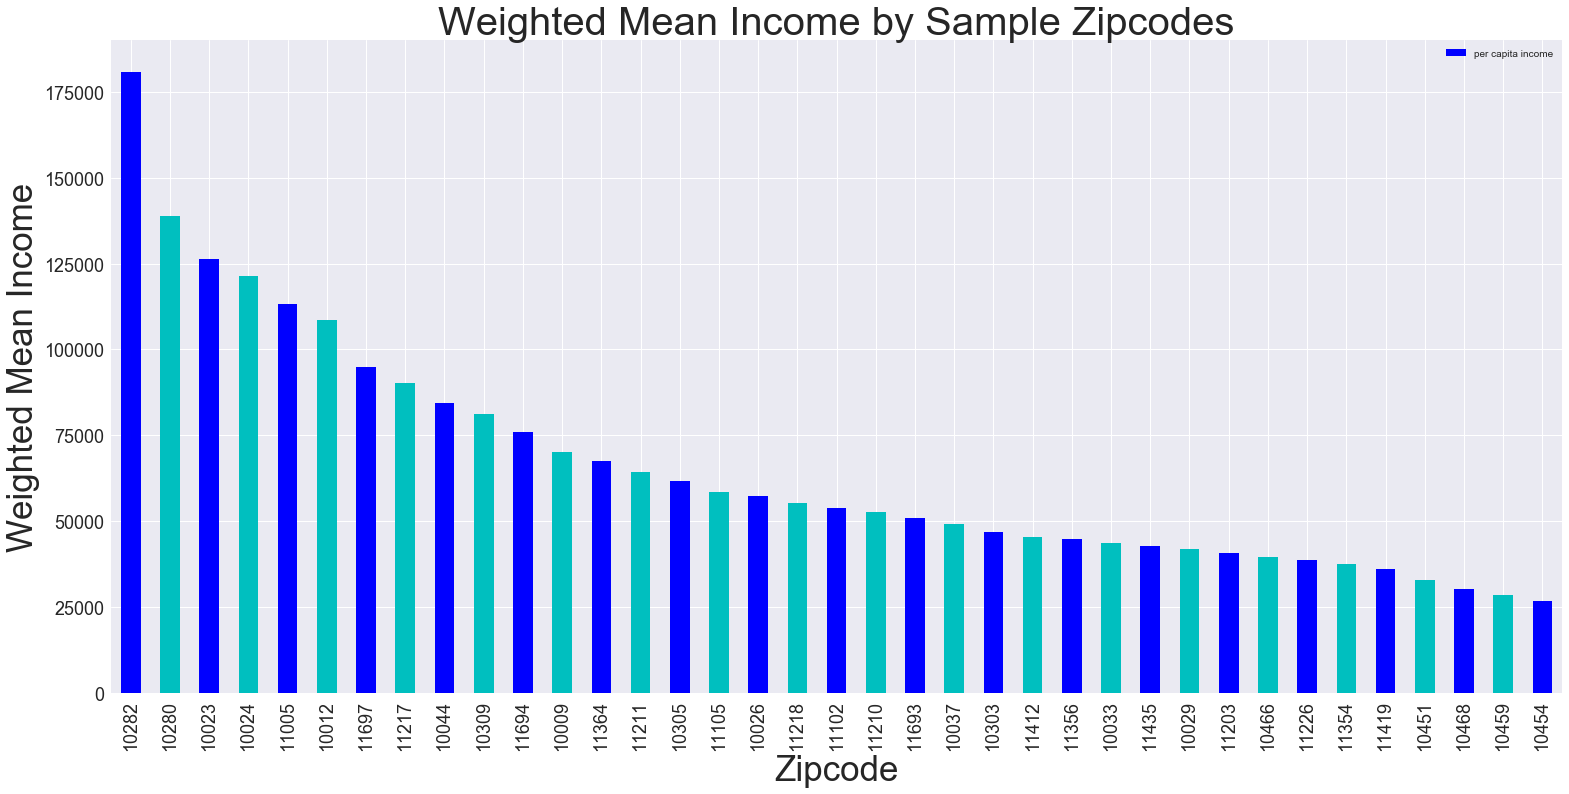

In [11]:
#Plotting values of data in increments of 5

my_colors = 'bc'
plt.figure(figsize=(26,12))
tax_info4.sort_values(by = ['per capita income'], ascending = False, inplace = True)
tax_info4['per capita income'][0:200:5].plot(kind = 'bar', color=my_colors, fontsize = 18, legend = 'Weighted Mean Income')
plt.xlabel('Zipcode', fontsize = 35)
plt.ylabel('Weighted Mean Income', fontsize = 35)
plt.title('Weighted Mean Income by Sample Zipcodes', fontsize = 40)


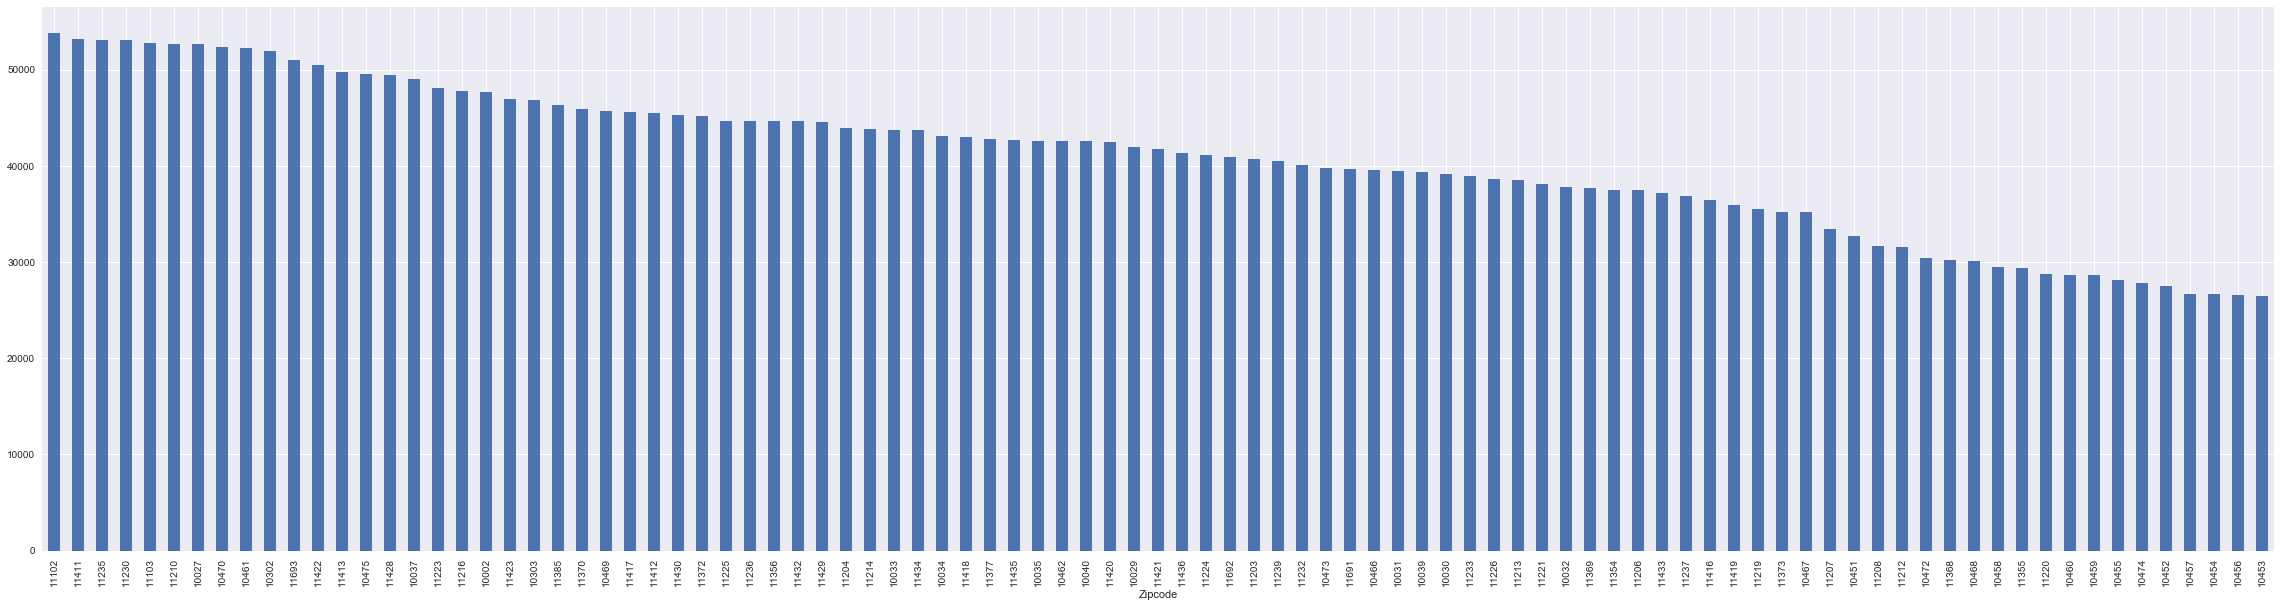

In [12]:
# Looking at broader dataset

plt.figure(figsize=(40,10))
tax_info4['per capita income'][90:200].plot('bar');

In [16]:
tax_info5 = tax_info4['per capita income'].nlargest(10) # Ten highest earning zipcodes
tax_info6 = tax_info5.index.values.tolist()
tax_info6

[10282, 10007, 10069, 10162, 10004, 10280, 11109, 10022, 10005, 10021]

In [18]:
# Plot data for Tribeca by income bracket
tax_info8 = tax_info2[tax_info2['Zipcode'] == 10007]
tax_info8.set_index('Income_Ceiling', inplace=True)

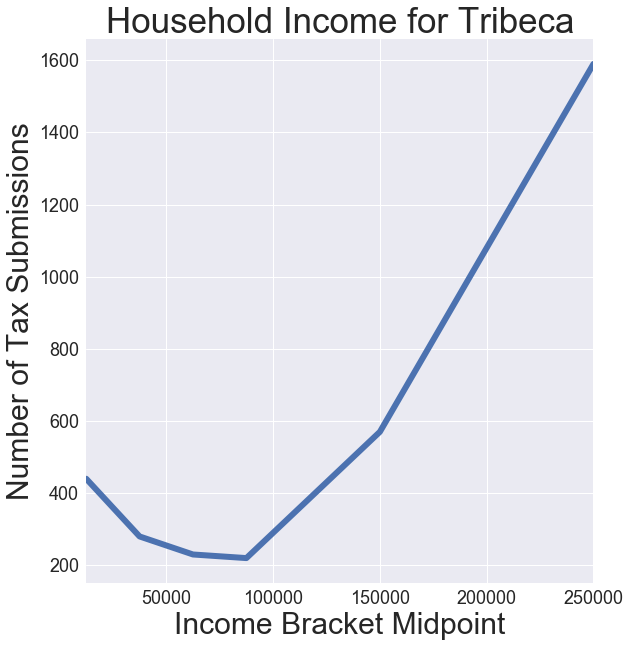

In [19]:

plt.figure(figsize=(20,10))
plt.subplot(122)
tax_info8['Number of returns'].plot(fontsize = 18, linewidth = 6)
plt.xlabel('Income Bracket Midpoint', fontsize = 30)
plt.ylabel('Number of Tax Submissions', fontsize = 30)
plt.title('Household Income for Tribeca', fontsize = 35)

In [20]:
# Plot data for Mott Haven by income bracket

tax_info9 = tax_info2[tax_info2['Zipcode'] == 10454]
tax_info9.set_index('Income_Ceiling', inplace=True)


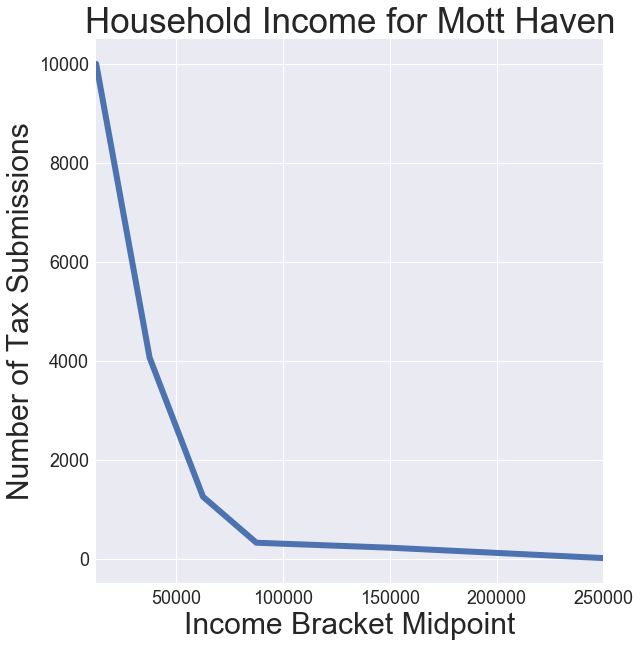

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(122)
tax_info9['Number of returns'].plot(fontsize = 18, linewidth = 6)
plt.xlabel('Income Bracket Midpoint', fontsize = 30)
plt.ylabel('Number of Tax Submissions', fontsize = 30)
plt.title('Household Income for Mott Haven', fontsize = 35)
